In [14]:
import cv2
import numpy as np
from pathlib import Path
import trackpy as tp
import pandas as pd
from pandas import DataFrame, Series

In [15]:
video = "/data/groups/wheelenj/miracidia/20250822a02sao_20250822_151916.25128038/000000.mp4"

worm_vid = cv2.VideoCapture(video)
# num_frames = int(worm_vid.get(cv2.CAP_PROP_FRAME_COUNT))
num_frames = 1000
ret, frame = worm_vid.read()
if ret == True:
    frame_shape = frame.shape
# Reset the video capture to the first frame
worm_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
worm_arr = np.zeros((num_frames, frame_shape[0], frame_shape[1]), np.uint8)
for i in range(num_frames):
    if i % 50 == 0:
        print(f"Loading frame {i} to memory.")
    ret, frame = worm_vid.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    worm_arr[i] = frame

Loading frame 0 to memory.
Loading frame 50 to memory.
Loading frame 100 to memory.
Loading frame 150 to memory.
Loading frame 200 to memory.
Loading frame 250 to memory.
Loading frame 300 to memory.
Loading frame 350 to memory.
Loading frame 400 to memory.
Loading frame 450 to memory.
Loading frame 500 to memory.
Loading frame 550 to memory.
Loading frame 600 to memory.
Loading frame 650 to memory.
Loading frame 700 to memory.
Loading frame 750 to memory.
Loading frame 800 to memory.
Loading frame 850 to memory.
Loading frame 900 to memory.
Loading frame 950 to memory.


In [16]:
i = 0
chunk = 25
for frame in worm_arr:
    if i % chunk == 0:
        print(f"Processing frame {i}")
        print(f"Regenerating background using frames {i} to {i+chunk}.")
        background = np.amax(worm_arr[i : i + chunk, :, :], axis=0)
    arr = np.absolute((frame - background).astype(np.int8))
    worm_arr[i] = arr
    i += 1



Processing frame 0
Regenerating background using frames 0 to 25.
Processing frame 25
Regenerating background using frames 25 to 50.
Processing frame 50
Regenerating background using frames 50 to 75.
Processing frame 75
Regenerating background using frames 75 to 100.
Processing frame 100
Regenerating background using frames 100 to 125.
Processing frame 125
Regenerating background using frames 125 to 150.
Processing frame 150
Regenerating background using frames 150 to 175.
Processing frame 175
Regenerating background using frames 175 to 200.
Processing frame 200
Regenerating background using frames 200 to 225.
Processing frame 225
Regenerating background using frames 225 to 250.
Processing frame 250
Regenerating background using frames 250 to 275.
Processing frame 275
Regenerating background using frames 275 to 300.
Processing frame 300
Regenerating background using frames 300 to 325.
Processing frame 325
Regenerating background using frames 325 to 350.
Processing frame 350
Regenerating

In [17]:
from IPython.display import clear_output
import logging

# Remove IPythonStreamHandler if present
for handler in tp.logger.handlers[:]:
    if handler.__class__.__name__ == "IPythonStreamHandler":
        tp.logger.removeHandler(handler)

# Add a standard stream handler if not present
if not any(isinstance(h, logging.StreamHandler) for h in tp.logger.handlers):
    tp.logger.addHandler(logging.StreamHandler())

diameter = 23
minmass = 550
noise_size = 1
topn = None

t = tp.batch(worm_arr, diameter=diameter, minmass=minmass, topn=topn, noise_size=noise_size)


Frame 0: 4 features
Frame 1: 7 features
Frame 2: 4 features
Frame 3: 3 features
Frame 4: 4 features
Frame 5: 5 features
Frame 6: 4 features
Frame 7: 3 features
Frame 8: 4 features
Frame 9: 3 features
Frame 10: 3 features
Frame 11: 4 features
Frame 12: 4 features
Frame 13: 3 features
Frame 14: 6 features
Frame 15: 4 features
Frame 16: 3 features
Frame 17: 3 features
Frame 18: 6 features
Frame 19: 3 features
Frame 20: 3 features
Frame 21: 3 features
Frame 22: 3 features
Frame 23: 3 features
Frame 24: 3 features
Frame 25: 2 features
Frame 26: 3 features
Frame 27: 3 features
Frame 28: 2 features
Frame 29: 2 features
Frame 30: 2 features
Frame 31: 2 features
Frame 32: 2 features
Frame 33: 2 features
Frame 34: 3 features
Frame 35: 3 features
Frame 36: 7 features
Frame 37: 7 features
Frame 38: 7 features
Frame 39: 2 features
Frame 40: 3 features
Frame 41: 3 features
Frame 42: 5 features
Frame 43: 4 features
Frame 44: 3 features
Frame 45: 2 features
Frame 46: 2 features
Frame 47: 2 features
Fr

In [20]:
search_range = 55
memory = 25
adaptive_stop = 15

t1 = tp.link(
        t, search_range=search_range, memory=memory, adaptive_stop=adaptive_stop
    )

Frame 1: 7 trajectories present.
Frame 2: 4 trajectories present.
Frame 3: 3 trajectories present.
Frame 4: 4 trajectories present.
Frame 5: 5 trajectories present.
Frame 6: 4 trajectories present.
Frame 7: 3 trajectories present.
Frame 8: 4 trajectories present.
Frame 9: 3 trajectories present.
Frame 10: 3 trajectories present.
Frame 11: 4 trajectories present.
Frame 12: 4 trajectories present.
Frame 13: 3 trajectories present.
Frame 14: 6 trajectories present.
Frame 15: 4 trajectories present.
Frame 16: 3 trajectories present.
Frame 17: 3 trajectories present.
Frame 18: 6 trajectories present.
Frame 19: 3 trajectories present.
Frame 20: 3 trajectories present.
Frame 21: 3 trajectories present.
Frame 22: 3 trajectories present.
Frame 23: 3 trajectories present.
Frame 24: 3 trajectories present.
Frame 25: 2 trajectories present.
Frame 26: 3 trajectories present.
Frame 27: 3 trajectories present.
Frame 28: 2 trajectories present.
Frame 29: 2 trajectories present.
Frame 30: 2 trajectorie

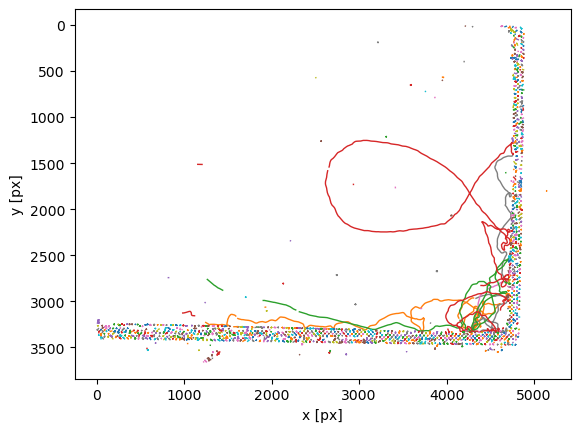

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [21]:
import matplotlib.pyplot as plt

# t1 = tp.filter_stubs(t1, 20)

plt.figure()
tp.plot_traj(t1)